<a href="https://colab.research.google.com/github/gautham1024/aiml_preconference/blob/main/animal_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install -q kaggle

In [19]:
!mkdir ~/.kaggle

In [20]:
!cp kaggle.json ~/.kaggle

In [21]:
! kaggle datasets download -d saumyamohandas/animal-dataset

 90% 56.0M/62.3M [00:00<00:00, 203MB/s]
100% 62.3M/62.3M [00:00<00:00, 197MB/s]


In [22]:
! unzip /content/archive.zip

Archive:  /content/archive.zip
replace dataset/Testing/bears/k4 (100).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Test

In [23]:
from keras.models import Sequential
from keras.layers import Convolution2D,Flatten,Dense,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen = ImageDataGenerator(horizontal_flip=True,rescale=1./255,zoom_range=0.2)

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
X_train = train_datagen.flow_from_directory("/content/dataset/Training",target_size=(128,128),batch_size=20)

Found 1238 images belonging to 4 classes.


In [27]:
X_test = test_datagen.flow_from_directory("/content/dataset/Testing",target_size=(128,128),class_mode='categorical',batch_size=20)

Found 326 images belonging to 4 classes.


In [28]:
#Model Building
model = Sequential()

In [29]:
#1st convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [30]:
#1st maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
#2nd convolution layer
model.add(Convolution2D(32,(3,3),activation='relu'))

In [32]:
#2nd maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
model.add(Flatten())

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144

In [35]:
model.add(Dense(300,activation='relu'))#hidden layer
model.add(Dense(150,activation='relu'))#hidden layer
model.add(Dense(4,activation='softmax'))#output layer
#for output layer if we are having 2 classes we must write sigmax, for more than 2 softmax. In our code we have 6 so we use softmax

In [36]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [37]:
#Training the Model
model.fit_generator(X_train,epochs=50,validation_data=X_test)

<ipython-input-37-3903bf7c1d5d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(X_train,epochs=50,validation_data=X_test)


Epoch 1/50
62/62 [==============================] - 14s 143ms/step - loss: 1.3659 - accuracy: 0.3643 - val_loss: 1.1727 - val_accuracy: 0.4264
Epoch 2/50
62/62 [==============================] - 7s 115ms/step - loss: 1.0923 - accuracy: 0.5186 - val_loss: 0.9982 - val_accuracy: 0.5031
Epoch 3/50
62/62 [==============================] - 8s 135ms/step - loss: 0.9050 - accuracy: 0.6050 - val_loss: 0.7078 - val_accuracy: 0.6994
Epoch 4/50
62/62 [==============================] - 8s 124ms/step - loss: 0.6841 - accuracy: 0.7383 - val_loss: 0.3624 - val_accuracy: 0.8865
Epoch 5/50
62/62 [==============================] - 8s 129ms/step - loss: 0.5710 - accuracy: 0.7746 - val_loss: 0.3635 - val_accuracy: 0.8466
Epoch 6/50
62/62 [==============================] - 8s 137ms/step - loss: 0.4499 - accuracy: 0.8320 - val_loss: 0.2304 - val_accuracy: 0.9172
Epoch 7/50
62/62 [==============================] - 7s 116ms/step - loss: 0.3576 - accuracy: 0.8635 - val_loss: 0.1481 - val_accuracy: 0.9448
Epoch

In [38]:
model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
#testing
import numpy as np
from keras.preprocessing import image

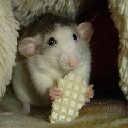

In [43]:
img = image.load_img('/content/dataset/Testing/rats/Z (10).jpeg',target_size =(128,128))
img

In [44]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 238ms/step


'bears'

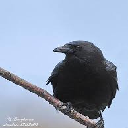

In [46]:
#testing 2
img = image.load_img('/content/dataset/Testing/crows/Z1  (27).jpg',target_size =(128,128))
img

In [47]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 18ms/step


'crows'

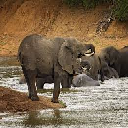

In [48]:
#testing 3
img = image.load_img('/content/dataset/Testing/elephants/Z (14).jpeg',target_size =(128,128))
img

In [49]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 18ms/step


'elephants'

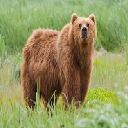

In [50]:
#testing 4
img = image.load_img('/content/dataset/Testing/bears/k4 (108).jpeg',target_size =(128,128))
img

In [51]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 18ms/step


'bears'

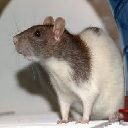

In [52]:
#testing 5
img = image.load_img('/content/dataset/Testing/rats/Z (7).jpeg',target_size =(128,128))
img

In [53]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 26ms/step


'rats'